In [1]:
#Untuk data frame
import pandas as pd
import numpy as np

#untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# ============  Non Regresor ============================\n",
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

# ============  Regressor  ============================\n",
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#============== metric ===========================================
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

#untuk spliting data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, mean_absolute_error



In [2]:
# Load the dataset
data = pd.read_excel("2022_drugs_perez_dataset2.xlsx")

In [3]:
data.head()

,Common_name,Ref,IUPAC_name,CAS_number,Formula,C,H,N,O,S,...,HOMO (eV),LUMO (eV),Ionization Energy I (eV),Electron Affinity A (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IE EXP (%),IE ARX (%)
0,Caffeine,https://pubchem.ncbi.nlm.nih.gov/compound/2519...,"1,3,7-trimethylpurine-2,6-dione",58-08-2,C8H10N4O2,8.0,10.0,4.0,2.0,0.0,...,-5.769,-1.977,5.769,1.977,3.8730,1.8960,0.968250,0.824631,92.0,91.454087
1,Acenocoumarol,https://pubchem.ncbi.nlm.nih.gov/compound/5467...,4-hidroxi-3-[1(4-nitrofenil)-3-oxobutil] crome...,152-72-7,C 19 H 15 N O 6,19.0,15.0,1.0,6.0,0.0,...,-6.399,-3.522,6.399,3.522,4.9605,1.4385,1.240125,0.708898,NaN,87.446037
2,Acetaminophen,https://pubchem.ncbi.nlm.nih.gov/compound/1983,N-(4-hydroxyphenyl)acetamide,103-90-2,C8H9NO2,8.0,9.0,1.0,2.0,0.0,...,-5.494,-1.646,5.494,1.646,3.5700,1.9240,0.892500,0.891372,85.8,89.054481
3,Acetazolamide,https://www.drugbank.ca/drugs/DB00819,"N-(5-sulfamoyl-1,3,4-thiadiazol-2-yl)acetamide",59-66-5,C4H6N4O3S2,4.0,6.0,4.0,3.0,2.0,...,-7.010,-3.358,7.010,3.358,5.1840,1.8260,1.296000,0.497262,93.0,89.005598
4,Acetic acid,https://www.drugbank.ca/drugs/DB03166,acetic acid,64-19-7,C2H4O2,2.0,4.0,2.0,0.0,0.0,...,-6.816,-1.070,6.816,1.070,3.9430,2.8730,0.985750,0.532022,92.0,88.551715


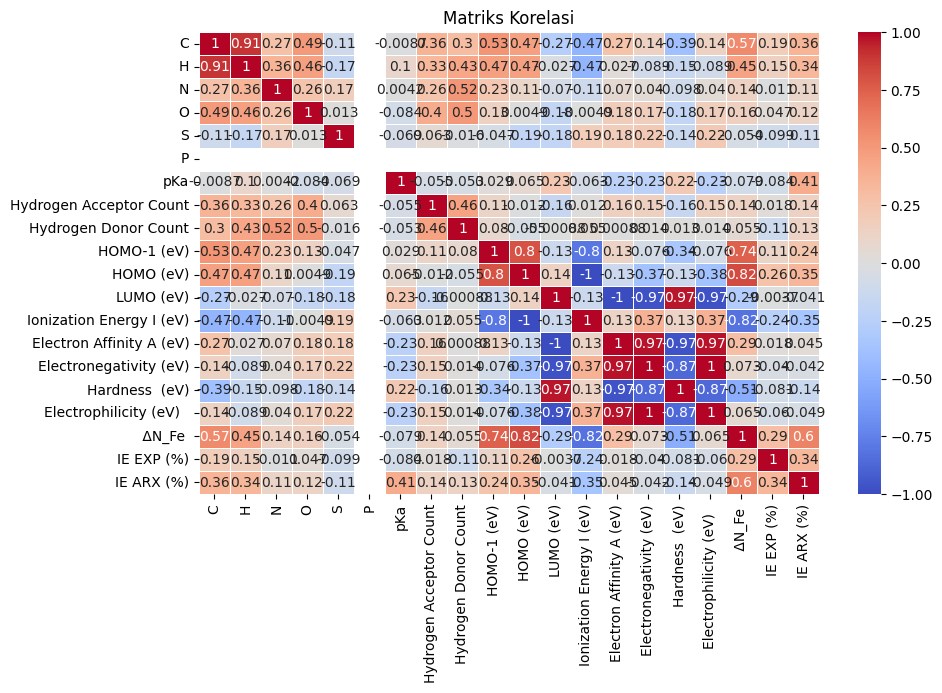

In [6]:
# Matriks korelasi
correlation_matrix = data.corr(numeric_only=True)

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

In [4]:
data_model = data.loc[:,['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']] = data[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']]

In [5]:
data_model.dropna(inplace=True)

In [6]:
data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']] = data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']].replace(',', '.', regex=True)

In [7]:
data_model["Polarizability (Å3)"] = data_model["Polarizability (Å3)"].astype('float')

In [8]:
# data_model.drop('IE EXP (%)',axis=1,inplace=True)

In [9]:
# nama_file_csv = 'data_baru.csv'
# data_model.to_csv(nama_file_csv, index=False)

In [10]:
data_model.head()

,Molecular_weight MW (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Electronegativity (eV),ΔN_Fe,IE EXP (%)
0,194.19,14.00,-0.07,-0.97,58.44,18.96,-5.769,-1.977,3.873,0.824631,92.0
2,151.16,9.90,0.91,-1.60,49.33,15.52,-5.494,-1.646,3.570,0.891372,85.8
3,222.30,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,5.184,0.497262,93.0
4,60.05,4.80,-0.17,1.22,37.30,5.34,-6.816,-1.070,3.943,0.532022,92.0
11,137.14,3.38,0.83,-0.40,63.32,13.44,-5.922,-2.122,4.022,0.783684,80.0


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data X yang akan dinormalisasi (kecuali 'IE EXP (%)')
X_data = data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P', 'Log S', 'Polar Surface Area (Å2)', 'Polarizability (Å3)', 'HOMO (eV)', 'LUMO (eV)', 'Electronegativity (eV)', ' ΔN_Fe ']]

# Inisialisasi MinMaxScaler untuk X
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X_data)

# Mengganti kolom-kolom dalam data_model dengan data yang sudah dinormalisasi
data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P', 'Log S', 'Polar Surface Area (Å2)', 'Polarizability (Å3)', 'HOMO (eV)', 'LUMO (eV)', 'Electronegativity (eV)', ' ΔN_Fe ']] = X_normalized

# Kolom 'IE EXP (%)' tidak perlu dinormalisasi
# Sekarang Anda dapat menggabungkan data yang sudah dinormalisasi dengan 'IE EXP (%)'
data_normalized = data_model


In [12]:
data_normalized.head()

,Molecular_weight MW (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Electronegativity (eV),ΔN_Fe,IE EXP (%)
0,0.191702,0.184319,0.610360,0.540921,0.166591,0.170354,0.456455,0.181802,0.733522,0.253036,92.0
2,0.136381,0.129558,0.683934,0.460358,0.139098,0.128073,0.549644,0.211243,0.684572,0.299814,85.8
3,0.227842,0.114866,0.596096,0.363171,0.337408,0.172812,0.035920,0.058970,0.945315,0.023591,93.0
4,0.019246,0.061440,0.602853,0.820972,0.102792,0.002950,0.101660,0.262474,0.744830,0.047954,92.0
11,0.118356,0.042474,0.677928,0.613811,0.181319,0.102507,0.404609,0.168905,0.757593,0.224338,80.0


In [13]:
X = data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']]
y = data_model['IE EXP (%)']

Hasil Testing GBR + SPLITING 40:60 + poli
Mean Squared Error: 0.00012934460557423983
Root Mean Squared Error: 0.011372976988204971
Mean Absolute Error: 0.008910858949923828
R^2 Score: 0.9999959701893434
 
Hasil Training GBR + SPLITING 40:60 + poli
Mean Squared Error: 0.0048701457721688326
Root Mean Squared Error: 0.0697864297135828
Mean Absolute Error: 0.056223710599548615
R^2 Score: 0.9998997440415798


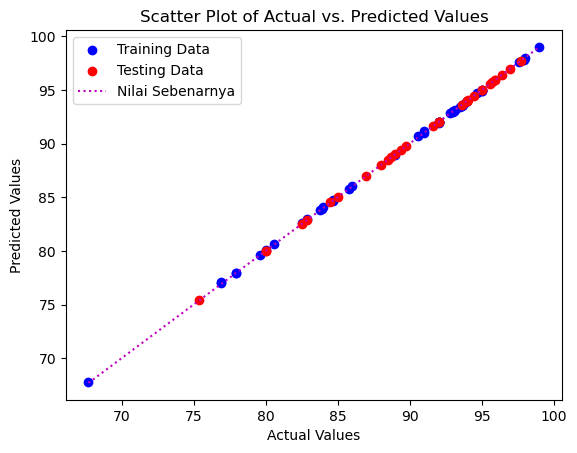

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inisialisasi model dengan fitur polinomial derajat 2
model_pipeline = make_pipeline(PolynomialFeatures(degree=2), GradientBoostingRegressor())

# Evaluasi model pada subset pengujian
print("Hasil Testing GBR + SPLITING 40:60 + poli")
prediction_test = evaluation(X_test, y_test, model_pipeline)
print(" ")
print("Hasil Training GBR + SPLITING 40:60 + poli")
prediction_train = evaluation(X_train, y_train, model_pipeline)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()

In [15]:
# import joblib

# # Save the model using joblib
# joblib.dump(model_pipeline, 'modelgbr2.joblib')

['modelgbr2.joblib']

In [16]:
# import pickle

# # Save the model using pickle
# with open('modelgbr.pkl', 'wb') as model_file:
#     pickle.dump(model_pipeline, model_file)